#### Сборный проект. Первичный анализ данных.
В качестве сотрудника интернет-магазина мне необходимо проанализировать исторические данные о продажах игр. В доступе имеется следующая информация об играх: жанр, платформа и год выпуска, оценки пользователей, критиков и рейтинг, а также сведения о продажах на разных рынках: Северная Америка, Европа, Япония и другие страны. На основе имеющихся данных с целью построения рекламной стратегии компании нужно проанализоровать и выявить закономерности, определяющие успешность игры.
В процессе исследования я планирую осуществить следующие шаги:

1. Открыть файл с данными, изучить информацию о них.
2. Выявить пропуски и при возможности обработать их, объяснить возможные причины возникновения.
3. При необходимости изменить тип данных в столбцах.
4. Посчитать общие продажи по всем регионам.
5. На этапе исследовательского анализа данных изучить имеющуюся информацию по годам для выявления актуального периода, на основе которого будет возможным сделать прогнозы на 2017 год.
6. Проанализировать самые популярные платформы, а также выявить потенциально прибыльные платформы на основе их роста в актуальный период.
7. Определить возможные зависимости продаж игр от оценок пользователей и критиков.
8. Проанализировать жанровое распределение для выявления наиболее и наименее прибыльных.
9. Построить необходимые графики и диаграммы для визуализации сделанных выводов.
10. Составить портреты пользователей трех регионов для определения общих и отличительных особенностей в популярности платформ, жанров и влиянии рейтинга на продажи.
11. На последнем этапе исследования проверить гипотезы:
    - о равенстве пользователских рейтингов платформ XBox и PC;
    - об отличии пользователских рейтингов игр в жанрах экшен и спорт.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
game_data = pd.read_csv('/datasets/games.csv')

In [3]:
display(game_data.head(20))
display(game_data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

После первичного анализа данных можно оценить объем и содержание имеющейся информации. В работе таблица с 16714 строками и 11 столбцами данных смешанного и числового типа. На этапе предобработки необходимо произвести выявление и обработку пропусков, а также приведение типа данных к другому формату по необходимости.

#### Предобработка данных

In [4]:
#приведение названий столбцов к нижнему регистру
game_data.columns = game_data.columns.str.lower()
display(game_data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
#удаление строк с пропусками в столбце с годом выпуска
display(game_data['year_of_release'].isna().sum())
game_data = game_data.dropna(subset = ['year_of_release'])

269

In [6]:
#замена типа данных на целочисленный
game_data['year_of_release'] = game_data['year_of_release'].astype(int)
display(game_data.year_of_release.dtype)

dtype('int64')

В столбце с годом выпуска пропусков оказалось немного, поэтому было решено их удалить и после этого привести к целочисленному типу для упрощения обработки.

In [7]:
display(game_data.isna().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [8]:
display(game_data[(game_data['critic_score'].isna()) & (game_data['user_score'].isna()) & (game_data['rating'].isna()) & (game_data['year_of_release'] < 1999)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16207,Rock N' Roll Racing,SNES,1993,Racing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16326,Victory Spike,PS,1996,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16468,Meru Purana,PS,1996,Strategy,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [9]:
game_data_late = game_data[~((game_data['critic_score'].isna()) & (game_data['user_score'].isna()) & (game_data['rating'].isna()) & (game_data['year_of_release'] < 1999))]
display(game_data_late.shape[0])
display(game_data_late.shape[0] / game_data.shape[0])

14875

0.9044752523409948

Причиной пропусков в столбцах с информацией об оценках и рейтинге игр может быть отсутствие этих данных на момент их выгрузки для изучения. 
1. Для игр, вышедших в 80-90-е годы, такая информация может отсутствовать по причине их устаревшести и потери интереса к ним, а в столбце рейтинг по причине того, что в те годы рейтинг для игр не было принято определять. Таких строк меньше 10% от всего датафрейма, их было принято удалить.

2. Более поздних игр с пропусками в вышеперечисленных столбцах (оценка критиков, пользователей и рейтинг игры) слишком много, чтобы их удалить. Заменить на ноль также не кажется хорошей идеей, так как это может исказить данные. Заполнить на основе категорий игр: недостаточно информации для категоризации. Кроме способа с подтягиванием этих данных со сторонних проверенных ресурсов с актуальными данными об играх, другие идеи в голову не приходят. Решено оставить пропуски без изменений на данный момент.

In [10]:
#проверка значения tbd в столбце с оценкой пользователей
display(game_data_late[game_data_late['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Аббревиатура tbd ('to be determined') обозначает отсутствие пользовательского рейтинга у данной игры, часто по причине недостаточного количества отзывов пользователей для его определения. Для начала заменим его на пропуски, тогда будет возможно обрабатывать данные в столбце как числовые.

In [11]:
#game_data_late[game_data_late['user_score'] == 'tbd', 'user_score'] = 0
#game_data_late['user_score'] = np.where(game_data_late['user_score'] == 'tbd', None, game_data_late['user_score'])
#display(game_data_late[game_data_late['user_score'] == 'tbd'])
game_data_late.loc[game_data_late['user_score'] == 'tbd', 'user_score'] = np.nan
display(game_data_late[game_data_late['user_score'] == 'tbd'])

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [12]:
game_data_late['user_score'] = game_data_late['user_score'].astype(float)
display(game_data_late.user_score.dtype)

/tmp/ipykernel_31/2397980450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data_late['user_score'] = game_data_late['user_score'].astype(float)


dtype('float64')

Тип данных в столбце с оценками пользователей был изменен на числовой с целью необходимости произведения дальнейших расчетов.

In [17]:
#считаем суммарные продажи во всех регионах
#game_data_late['total_sales'] = game_data_late['na_sales'] + game_data_late['eu_sales'] + game_data_late['jp_sales'] + game_data_late['other_sales']
game_data_late['total_sales'] = game_data_late[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(game_data_late.head(10))

/tmp/ipykernel_31/3722607664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data_late['total_sales'] = game_data_late[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70


Таким образом, на этапе предобработки данных были сделаны следующие шаги:
1. Удалены пропуски в столбце с годом выпуска игры, тип данных изменен на целочисленный.
2. Удалены данные с пропусками сразу в трех столбцах (оценки пользователей, критиков и рейтинг), если год выпуска был раньше 1999 года. После удаления осталось 90% данных.
3. Значение tbd в столбце с пользовательским рейтингом заменено на Nan, тип данных изменен на числовой.
4. Добавлен столбец с суммарными данными по продажам во всех регионах.

#### Исследовательский анализ данных

In [21]:
#сколько игр выпускалось в разные годы
yearly_game_data = game_data_late.groupby('year_of_release')['name'].count()
display(yearly_game_data)

year_of_release
1985       1
1988       1
1992       2
1994       1
1996       8
1997      21
1998      33
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Количество выпущенных игр до 1999 года слишком мало по сравнению с более поздним периодом, поэтому данные о них представляются незначительными для общего анализа.

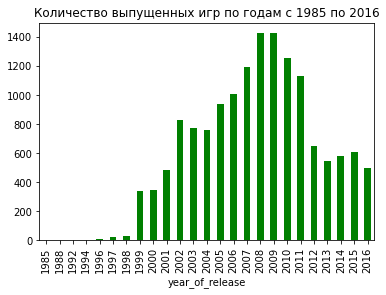

In [23]:
yearly_game_data.plot(kind = 'bar', title = 'Количество выпущенных игр по годам с 1985 по 2016', color = 'g')
plt.show()

In [24]:
#выявление платформ с наибольшими продажами по всем регионам
display(game_data_late.groupby('platform')['total_sales'].sum().sort_values(ascending = False))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       390.79
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       228.49
GC       196.73
XOne     159.32
N64       95.17
WiiU      82.19
GB        67.00
PSV       53.81
DC        12.57
WS         1.42
SNES       0.26
SAT        0.09
Name: total_sales, dtype: float64

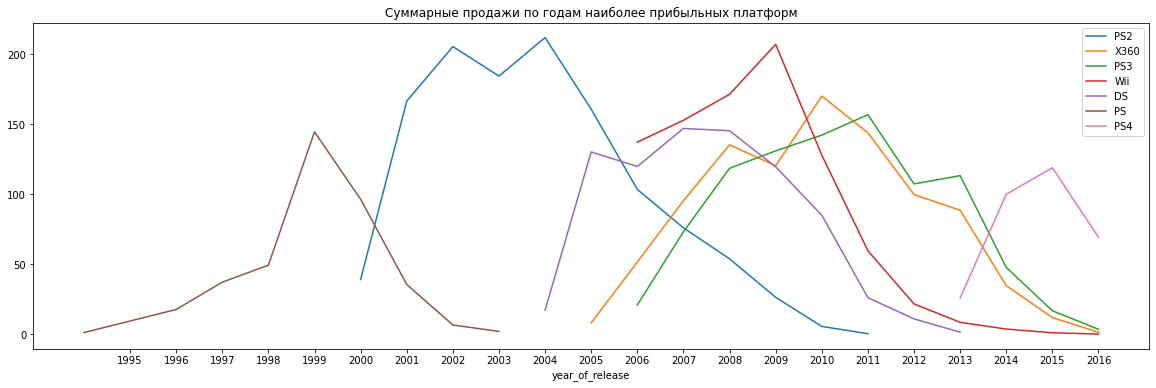

In [25]:
#построения графика распределения по годам
plt.subplots(figsize=(20, 6))
ax = game_data_late[game_data_late['platform'] == 'PS2'][['year_of_release', 'total_sales']].groupby('year_of_release')['total_sales'].sum().plot(x = 'year_of_release', y = 'total_sales')
ax = game_data_late[game_data_late['platform'] == 'X360'][['year_of_release', 'total_sales']].groupby('year_of_release')['total_sales'].sum().plot(x = 'year_of_release', y = 'total_sales')
ax = game_data_late[game_data_late['platform'] == 'PS3'][['year_of_release', 'total_sales']].groupby('year_of_release')['total_sales'].sum().plot(x = 'year_of_release', y = 'total_sales')
ax = game_data_late[game_data_late['platform'] == 'Wii'][['year_of_release', 'total_sales']].groupby('year_of_release')['total_sales'].sum().plot(x = 'year_of_release', y = 'total_sales')
ax = game_data_late[game_data_late['platform'] == 'DS'][['year_of_release', 'total_sales']].groupby('year_of_release')['total_sales'].sum().plot(x = 'year_of_release', y = 'total_sales')
ax = game_data_late[game_data_late['platform'] == 'PS'][['year_of_release', 'total_sales']].groupby('year_of_release')['total_sales'].sum().plot(x = 'year_of_release', y = 'total_sales')
ax = game_data_late[game_data_late['platform'] == 'PS4'][['year_of_release', 'total_sales']].groupby('year_of_release')['total_sales'].sum().plot(x = 'year_of_release', y = 'total_sales')
plt.title('Суммарные продажи по годам наиболее прибыльных платформ')
labels1 = [r'PS2', r'X360', r'PS3', r'Wii', r'DS', r'PS', r'PS4']
plt.legend(labels1, loc='upper right')
plt.xticks(np.arange(1995, 2017, step=1))
plt.show()

Было выбрано семь платформ с наибольшей суммой продаж по всем регионам. Распределение по годам можно увидеть на графике сверху.
Можно сделать вывод о том, что платформы появляются и сменяют друг друга за примерный период в 10 лет. В последнее десятилетие до 2016 года упорно конкурировали X360 и PS3, а самой последней на рынок вышла PS4.

In [26]:
#платформы за актуальный период
new_game_data = game_data_late[game_data_late['year_of_release'] >= 2013]
display(new_game_data.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = ['sum', 'mean']))

sum        mean
                         total_sales total_sales
platform year_of_release                        
3DS      2013                  56.57    0.621648
         2014                  43.76    0.547000
         2015                  27.78    0.323023
         2016                  15.14    0.329130
DS       2013                   1.54    0.192500
PC       2013                  12.38    0.325789
         2014                  13.28    0.282553
         2015                   8.52    0.170400
         2016                   5.25    0.097222
PS3      2013                 113.25    0.898810
         2014                  47.76    0.442222
         2015                  16.82    0.230411
         2016                   3.60    0.094737
PS4      2013                  25.99    1.624375
         2014                 100.00    1.333333
         2015                 118.90    0.867883
         2016                  69.25    0.422256
PSP      2013                   3.14    0.058148
         2014                   0.24    0.024000
         2015                   0.12    0.040000
PSV      2013                  10.59    0.168095
         2014                  11.90    0.119000
         2015                   6.25    0.056818
         2016                   4.25    0.050000
Wii      2013                   8.59    0.715833
         2014                   3.75    0.625000
         2015                   1.14    0.285000
         2016                   0.18    0.180000
WiiU     2013                  21.65    0.515476
         2014                  22.03    0.710645
         2015                  16.35    0.583929
         2016                   4.60    0.328571
X360     2013                  88.58    1.181067
         2014                  34.74    0.551429
         2015                  11.96    0.341714
         2016                   1.52    0.116923
XOne     2013                  18.96    0.997895
         2014                  54.07    0.886393
         2015                  60.14    0.751750
         2016                  26.15    0.300575

Для прогнозирования продаж на 2017 год выбраны суммы продаж игр по платформам, вышедших после 2013 года. Как видно из сводной таблицы, общие продажи всех платформ, кроме PS4 и XOne падали до 2016 года (данные за него неполные, поэтому могут учитываться в меньшей степени). Также можно обратить внимание на платформу WiiU, так как падение было незначительным, а средняя сумма продаж за 2015 год превышает эту же сумму за 2013 год.

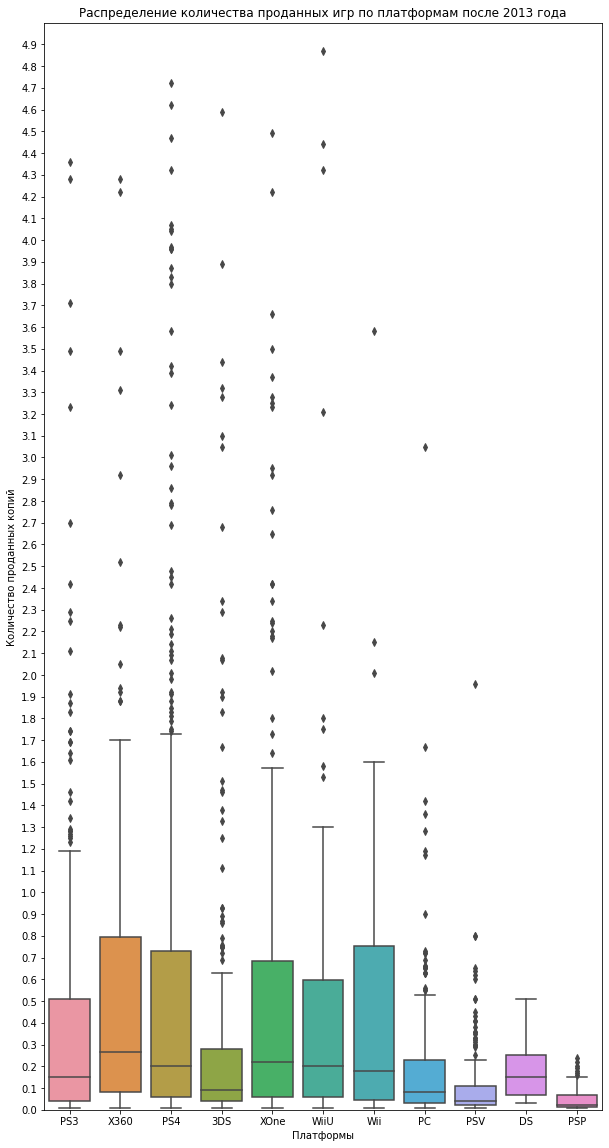

In [27]:
#график «ящик с усами»
plt.subplots(figsize=(10, 20))
ax = sns.boxplot(x = new_game_data['platform'], y = new_game_data['total_sales'])
ax.set(ylim = (0, 5))
ax.set_yticks(np.arange(0, 5, step = 0.1))
ax.set_title('Распределение количества проданных игр по платформам после 2013 года')
ax.set_xlabel('Платформы')
ax.set_ylabel('Количество проданных копий')
plt.show()

На графике выше можно увидеть распределение глобальных продаж в разбивке по платформам начиная с 2013 года. Для наглядности был взят диапазон до 5 млн, так как большинство значений находятся именно в нем. Самые высокие медианные значения находятся в диапазоне около 0.2 млн для тех же трех платформ, выделенных выше (PS4, XOne, WiiU), а также для платформы X360 с наибольшим медианным значением суммарных продаж игр за последние годы. Наиболее низкие медианные суммы продаж начиная с 2013 года у платформ PSP, PSV.

In [28]:
#влияние на продажи отзывов пользователей и критиков для PS4
PS4_game_data = new_game_data[new_game_data['platform'] == 'PS4']
display(PS4_game_data['total_sales'].corr(PS4_game_data['user_score']))
display(PS4_game_data['total_sales'].corr(PS4_game_data['critic_score']))

-0.031957110204556376

0.406567902061781

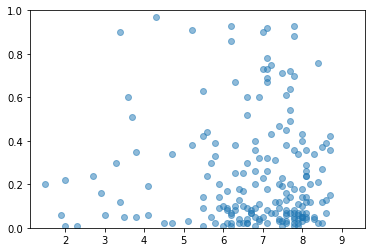

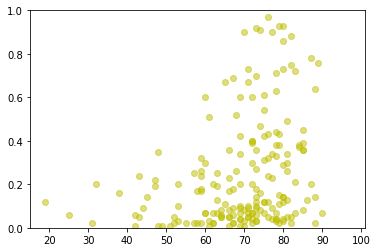

In [30]:
ax = plt.scatter(PS4_game_data['user_score'], PS4_game_data['total_sales'], alpha=0.5)
plt.ylim(0, 1)
plt.show()
ax1 = plt.scatter(PS4_game_data['critic_score'], PS4_game_data['total_sales'], color = 'y', alpha=0.5)
plt.ylim(0, 1)
plt.show()

Как видно на графиках рассеяния, зависимость глобальных продаж платформы PS4 от оценок пользователей и критиков различается (для наглядности взят диапазон до 1 млн проданных копий), так как большинство значений находится именно там. Исходя из рассчитанного коэффициента корреляции, существует некая слабая зависимость между оценкой критиков и количеством проданных копий в мире (коэффициент 0.4). Она все-таки значительно превышает это же значение коэффициента зависимости продаж от оценки пользователей (-0.03), отрицательным значением которого можно пренебречь.

In [31]:
#сравним с данными по другим платформам XOne, WiiU, X360
XOne_game_data = new_game_data[new_game_data['platform'] == 'XOne']
print('Зависимость продаж для платформы XOne: от оценок пользователей:', XOne_game_data['total_sales'].corr(XOne_game_data['user_score']))
print('от оценок критиков:', XOne_game_data['total_sales'].corr(XOne_game_data['critic_score']))
WiiU_game_data = new_game_data[new_game_data['platform'] == 'WiiU']
print('Зависимость продаж для платформы WiiU: от оценок пользователей:', WiiU_game_data['total_sales'].corr(WiiU_game_data['user_score']))
print('от оценок критиков:', WiiU_game_data['total_sales'].corr(WiiU_game_data['critic_score']))
X360_game_data = new_game_data[new_game_data['platform'] == 'X360']
print('Зависимость продаж для платформы X360: от оценок пользователей:', X360_game_data['total_sales'].corr(X360_game_data['user_score']))
print('от оценок критиков:', X360_game_data['total_sales'].corr(X360_game_data['critic_score']))

Зависимость продаж для платформы XOne: от оценок пользователей: -0.06892505328279412
от оценок критиков: 0.41699832800840175
Зависимость продаж для платформы WiiU: от оценок пользователей: 0.4193304819266187
от оценок критиков: 0.3764149065423912
Зависимость продаж для платформы X360: от оценок пользователей: -0.011742185147181342
от оценок критиков: 0.3503445460228664


Показатели для других платформ, выделенных как наиболее популярные с 2013 года, немного отличаются, но в двух из трех можно проследить ту же тенденцию. Для XOne и X360 это очень слабая отрицательная зависимость количества проданных копий от оценок пользователей (которой представляется логичным пренебречь) и прямая зависимость средней силы (0.41 и 0.35 коэффициенты корреляции соответственно) от оценок критиков. Для платформы WiiU показатель зависимости от оценок критиков очень близок к остальным (0.37), однако тут прослеживается и положительная зависимость средней силы от оценок пользователей (0.41). Данная гипотеза требует дальнейшей проверки.

In [32]:
#общее распределение игр по жанрам
genre_data = new_game_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').reset_index()
genre_data.columns = ['Жанр', 'Количество проданных копий']
display(genre_data.sort_values(by = ['Количество проданных копий'], ascending = False))

,Жанр,Количество проданных копий
8,Shooter,0.450
10,Sports,0.240
4,Platform,0.225
7,Role-Playing,0.125
2,Fighting,0.125
6,Racing,0.120
0,Action,0.110
9,Simulation,0.100
3,Misc,0.100
11,Strategy,0.080


В приведенной выше таблице взята выборка жанров игр и медианное количество проданных копий во всех регионах. Абсолютное лидерство с 2013 года принадлежит играм в жанре Shooter, на втором месте спортивные игры (Sports), ну и последние в тройке лидеров - Платформеры (жанр Platform).
Три последних места по медианному количеству проданных глобально копий занимают стратегии, головоломки и приключения (Strategy, Puzzle, Adventure) соответственно.

На этапе исследовательского анализа данных после изучения информации по годам, а также выявления наиболее популярных с 2000 года платформ, был определен актуальный период для построения дальнейших прогнозов (начиная с 2013 года). Именно на основе этих данных было выделено несколько потенциально прибыльных платформ, продажи которых отличал рост или незначительные колебания в актуальный период, а также платформа с наиболее высокими медианными продажами (PS4, XOne, WiiU и X360). Также на основе данных за актуальный период были выявлены следующие закономерности:
1. Зависимость продаж от оценок пользователей фактически отсутствует (за исключением платформы WiiU), зависимость же от оценок критиков прослеживается на среднем уровне (коэффициент 35-40%).
2. Жанры с наибольшим количеством продаж по всем регионам: шутеры, спортивные игры и платформеры; с наименьшим: стратегии, головоломки, приключения.

#### Портреты пользователей каждого региона

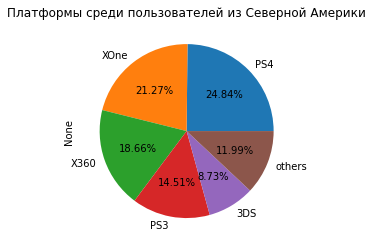

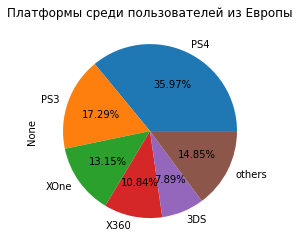

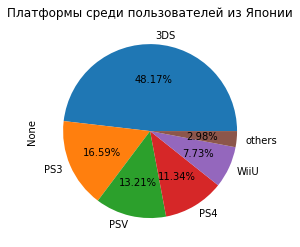

In [33]:
na_platform_data = new_game_data.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
na_platform_data2 = na_platform_data[:5].copy()
i = [na_platform_data[5:].sum()]
new_row = pd.Series(i, index = ['others'])
na_platform_data2 = na_platform_data2.append(new_row)
na_platform_data2.plot(kind = 'pie', autopct='%1.2f%%')
plt.title('Платформы среди пользователей из Северной Америки')
plt.show()

eu_platform_data = new_game_data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
eu_platform_data2 = eu_platform_data[:5].copy()
j = [eu_platform_data[5:].sum()]
new_row1 = pd.Series(j, index = ['others'])
eu_platform_data2 = eu_platform_data2.append(new_row1)
eu_platform_data2.plot(kind = 'pie', autopct='%1.2f%%')
plt.title('Платформы среди пользователей из Европы')
plt.show()

jp_platform_data = new_game_data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
jp_platform_data2 = jp_platform_data[:5].copy()
k = [jp_platform_data[5:].sum()]
new_row2 = pd.Series(k, index = ['others'])
jp_platform_data2 = jp_platform_data2.append(new_row2)
jp_platform_data2.plot(kind = 'pie', autopct='%1.2f%%')
plt.title('Платформы среди пользователей из Японии')
plt.show()

На приведенных выше графиках можно выявить следующие отличительные особенности регионов:
1. В Северной Америке в период 2013 - 2016 годов первенство делят платформы XOne и PS4, обладая практически равными долями популярности среди пользователей. Следующими идут XBox360 и PS3, значительную суммарную долю также занимают остальные платформы, то есть разнообразие достаточно широкое. Более высокая популярность именно XBox на североамериканском рынке по сравнению с другими регионами может быть объяснена тем, что страной разработки этой платформы является именно США. Эта представляет простор для дальнейших исследований.
2. Пользователи из Европы отдают явное предпочтение платформе PS4, за ней следуют PS3, другие и XBox One соответственно. Лидирующая четверка остается такой же, как в Северной Америке, отличаются доли рынка, определяя явное первенство одной платформы.
3. Совершенно другую картину мы наблюдаем на рынке Японии: там бесспорное лидерство у платформы 3DS (Nintendo). Это японская разработка, которая и заняла большую часть локального рынка, при этом среди пользователей Европы и Северной Америки она занимает только пятое место с 2013 по 2016 год. PS3 и PS4 также находятся среди лидеров этих лет, при этом XBox One и XBox 360 не входят в их число, занимая вместе с другими всего 2.98% рынка. В рядах лидирующих по продажам платформ в этом регионе также выделяются WiiU (также разработка Nintendo) и PSV (PlayStation Vita), портативная версия PlayStation, которые отсутствовали среди западных лидеров.

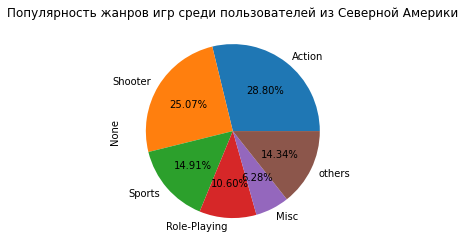

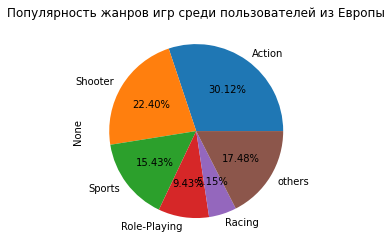

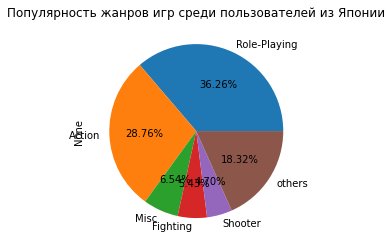

In [34]:
#топ-5 популярных жанров по регионам

na_genre_data = new_game_data.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
na_genre_data2 = na_genre_data[:5].copy()
l = [na_genre_data[5:].sum()]
new_row2 = pd.Series(l, index = ['others'])
na_genre_data2 = na_genre_data2.append(new_row2)
na_genre_data2.plot(kind = 'pie', autopct='%1.2f%%')
plt.title('Популярность жанров игр среди пользователей из Северной Америки')
plt.show()

eu_genre_data = new_game_data.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
eu_genre_data2 = eu_genre_data[:5].copy()
m = [eu_genre_data[5:].sum()]
new_row3 = pd.Series(m, index = ['others'])
eu_genre_data2 = eu_genre_data2.append(new_row3)
eu_genre_data2.plot(kind = 'pie', autopct='%1.2f%%')
plt.title('Популярность жанров игр среди пользователей из Европы')
plt.show()

jp_genre_data = new_game_data.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
jp_genre_data2 = jp_genre_data[:5].copy()
n = [jp_genre_data[5:].sum()]
new_row4 = pd.Series(n, index = ['others'])
jp_genre_data2 = jp_genre_data2.append(new_row4)
jp_genre_data2.plot(kind = 'pie', autopct='%1.2f%%')
plt.title('Популярность жанров игр среди пользователей из Японии')
plt.show()

Диаграммы популярности жанров среди пользователей из Северной Америки и Европы практически идентичны с небольшой разницей в процентах. Первое и второе места занимают соответственно экшены и шутеры, далее идут спортивные игры, игры прочих жанров и ролевые игры (RPG). Отличаются последние из пятерки лидеров: в Северной Америке это разнородные жанры (miscellaneous), в Европе это гоночные игры (racing games).
Другую картину мы наблюдаем на японском рынке: здесь лидируют RPG-игры, на втором месте находятся экшены с большой долей продаж как и в двух других регионах (28.76%). Пятерку лидеров замыкают файтинги, шутеры и разнородные жанры. Большая доля рынка также приходится на суммарное количество продаж игр других жанров, собственно, как и в других регионах, то есть разнообразие интересов пользователей достаточно широкое.

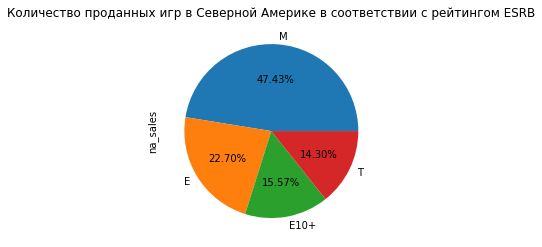

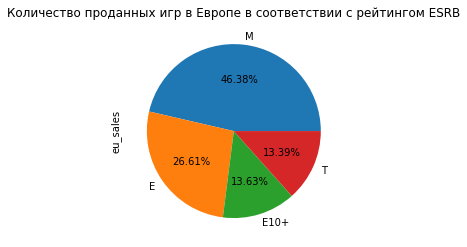

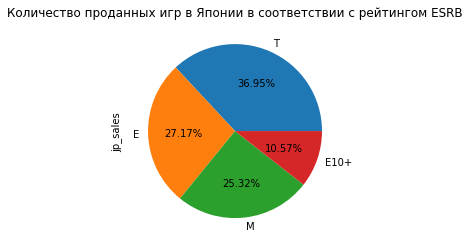

In [35]:
new_game_data.groupby('rating')['na_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.2f%%')
plt.title('Количество проданных игр в Северной Америке в соответствии с рейтингом ESRB')
plt.show()

new_game_data.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.2f%%')
plt.title('Количество проданных игр в Европе в соответствии с рейтингом ESRB')
plt.show()

new_game_data.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.2f%%')
plt.title('Количество проданных игр в Японии в соответствии с рейтингом ESRB')
plt.show()

Диаграммы продаж игр по регионам в зависимости от рейтинга ESRB снова выявляют отличие западных и восточного рынка. В Европе и Северной Америке наибольшее количество продаж у игр с рейтингом М (то есть для взрослых, старше 17 лет). В Японии самая популярная категория Т (подросткам), количество продаж игр для взрослых М на втором месте. Большую долю рынка во всех трех регионах занимают также игры категории Е (для всех) и Е10+ (для всех начиная с 10 лет).

На данном этапе были выполнены шаги по выявлению сходств и отличительных особенностей пользователей трех регионов в популярности платформ и жанров, а также зависимости продаж игр от их рейтинга. Подробные выводы сделаны после каждого этапа визуализации данных, в заключение кажется важным снова подчеркнуть следующие закономерности:
    
    1. Рынки Европы и Северной Америки характеризует больше общего между собой, рыной Японии ожидаемо стоит особняком с некоторым набором отличительных черт.
    2. В североамериканском регионе лидирующей платформой (наряду с PS, которая популярна везде) является XBox как продукт разработки США, в Японии бесспорное лидерство также у местных платформ на базе Nintendo. В Европе это, по большей части, PS4 и PS3, которые в сумме занимают половину рынка в актуальный период.
    3. Картина наиболее популярных жанров также очень схожа для регионов Европы и Северной Америки, в Японии на первом месте игры другого жанра. То же можно сказать и о рейтингах, в Японии наиболее популярная категория игр не та же, что в Европе и Америке.

#### Проверка гипотез

1. Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Альтернативная гипотеза: Средние пользовательские рейтинги платформы PC выше, чем у XBox One.

H0: µ1 = µ2 H1: µ1 != µ2

In [36]:
print(np.mean(game_data_late[game_data_late['platform'] == 'XOne']['user_score']))
print(np.mean(game_data_late[game_data_late['platform'] == 'PC']['user_score']))

6.521428571428572
7.065960264900661


In [37]:
XOne_score_data = game_data_late[(game_data_late['platform'] == 'XOne') & ~(game_data_late['user_score'].isna())]

PC_score_data = game_data_late[(game_data_late['platform'] == 'PC') & ~(game_data_late['user_score'].isna())]

alpha = 0.1
results = st.ttest_ind(XOne_score_data['user_score'], PC_score_data['user_score'], alternative = 'two-sided')
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


Выше необходимо было проверить гипотезу о том, что рейтинги двух платформ XBox One и PC одинаковые. В качестве альтернативной была выбрана двусторонняя гипотеза о том, что рейтинги все же отличаются.
На первом шаге были сделаны выборки по платформам и отсечены пропуски в данных о пользовательских оценках, так как они препятствовали проведению расчетов для проверки.
В качестве уровня статистической значимости alpha было выбрано значение 0.1, исходя из небольшого размера выборок.

В результате проверки мы отвергли нулевую гипотезу в пользу альтернативной, что пользовательские рейтинги двух платформ отличаются.

2. 
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны. 
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

H0: µ1 = µ2 H1: µ1 != µ2

In [38]:
print(np.mean(game_data_late[game_data_late['genre'] == 'Action']['user_score']))
print(np.mean(game_data_late[game_data_late['genre'] == 'Sports']['user_score']))

7.058129175946549
6.951433857539316


In [40]:
Action_score_data = game_data_late[(game_data_late['genre'] == 'Action') & ~(game_data_late['user_score'].isna())]

Sports_score_data = game_data_late[(game_data_late['genre'] == 'Sports') & ~(game_data_late['user_score'].isna())]

alpha = 0.05
results = st.ttest_ind(Action_score_data['user_score'], Sports_score_data['user_score'], alternative = 'two-sided')
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


В качестве альтернативной снова была выбрана двусторонняя гипотеза о том, что рейтинги жанров экшен и спорт отличаются (ее и необходимо было проверить). После выборок по жанрам без пропусков была произведена проверка. В качестве уровня статистической значимости alpha снова было выбрано значение 0.1, исходя из небольшого размера выборок.

В результате проверки мы не смогли отвергнуть нулевую гипотезу в пользу альтернативной.

#### Общий вывод

Было проведено исследование исторических данных об играх с целью выявления закономерностей и построения прогнозов на будущее.

После первичного изучения и предобработки данных, которая включала в себя обработку пропусков и внесение необходимых изменений в типы данных, был проведен исследовательский анализ. На этом этапе был определен актуальный период, наиболее подходящий для построения прогнозов, то есть для достижения главной цели проекта. Актуальным определен период с 2013 года, именно на его основе выделены три платформы, которые отличал рост или незначительные колебания (PS4, XOne, WiiU), а также платформа с наибольшими медианными продажами во всех регионах (X360). Для этих четырех платформ были проведены дальнейшие расчеты для выявления закономерностей:

    1. Фактическое отсутствие зависимости количества продаж от оценок пользователей (кроме платформы WiiU), наличие зависимости средней силы от оценок критиков.
    2. Наиболее популярные жанры среди пользователей всех регионов: шутеры, спортивные игры и платформеры.
    
На следующем этапе были визуализированы портреты пользователей разных регионов и сделаны соответствующие выводы об их сходствах и отличиях:

    1. Много общего в портретах пользователей из Европы и Северной Америки, больше отличий с японским регионом.
    2. Различия в лидирующих по популярности платформах, которые могут быть объяснены регионом разработки платформы: XBox для североамериканского рынка, Nintendo для Японии. PS4 и PS3 находятся среди лидеров во всех регионах.
    3. Схожие распределения популярности игр по жанрам и категориям рейтинга для Европы и Северной Америки, отличия для японского рынка: наиболее популярным жанром в этом регионе являются игры RPG, категория - Т (то есть для подростков). Для западных рынков лидеры по жанрам - игры экшены и шутеры, по рейтингу - категория М для взрослых.
    
На этапе проверки гипотез были сделаны следующие выводы:

    1. Гипотеза о равности пользовательских рейтингов платформ Xbox One и PC не подтвердилась. 
    2. Гипотеза о равности пользовательских рейтингов игр жанров Action и Sports подтвердилась, то есть мы отвергаем альтернативную.
    
    
На основе проведенного анализа и сделанных выводов бизнес может принять необходимые решения для построения прогнозов и рекламной стратегии на 2017 год. В этом ему помогут данные о потенциально прибыльных платформах и жанрах, а также понимание региональных отличий для возможной регионализации стратегий. Можно рекомендовать рекламным кампаниям в 2017 году делать ставку на PS4 и XBox для западных рынков, в Японии же не забывать о лидирующем положении платформы на базе Nintendo. Исходя из данных о наиболее популярных жанрах и возрастных категориях пользователей, можно выстраивать рекламные компании с ориентированностью именно на эти целевые аудитории, не забывая привлекать другие. Также нельзя забывать о влиянии оценок критиков на продажи, этот факт тоже можно использовать в выстраивании стратегии. Не менее важно дополнять данные о продажах и проводить дальнейшие исследования для корректировки результатов.